In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R
import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats
from matplotlib.collections import LineCollection

from pivot import metric
from pivot.plot import plot_grid, PivotSpaceVisualizer
from pivot.transform import PivotSpace

In [2]:
pivots = np.asarray([[-0.5,0], [0.5,0]])
piv = PivotSpace(metric.Euclid(),pivots)
viz = PivotSpaceVisualizer(piv, "/fig/")

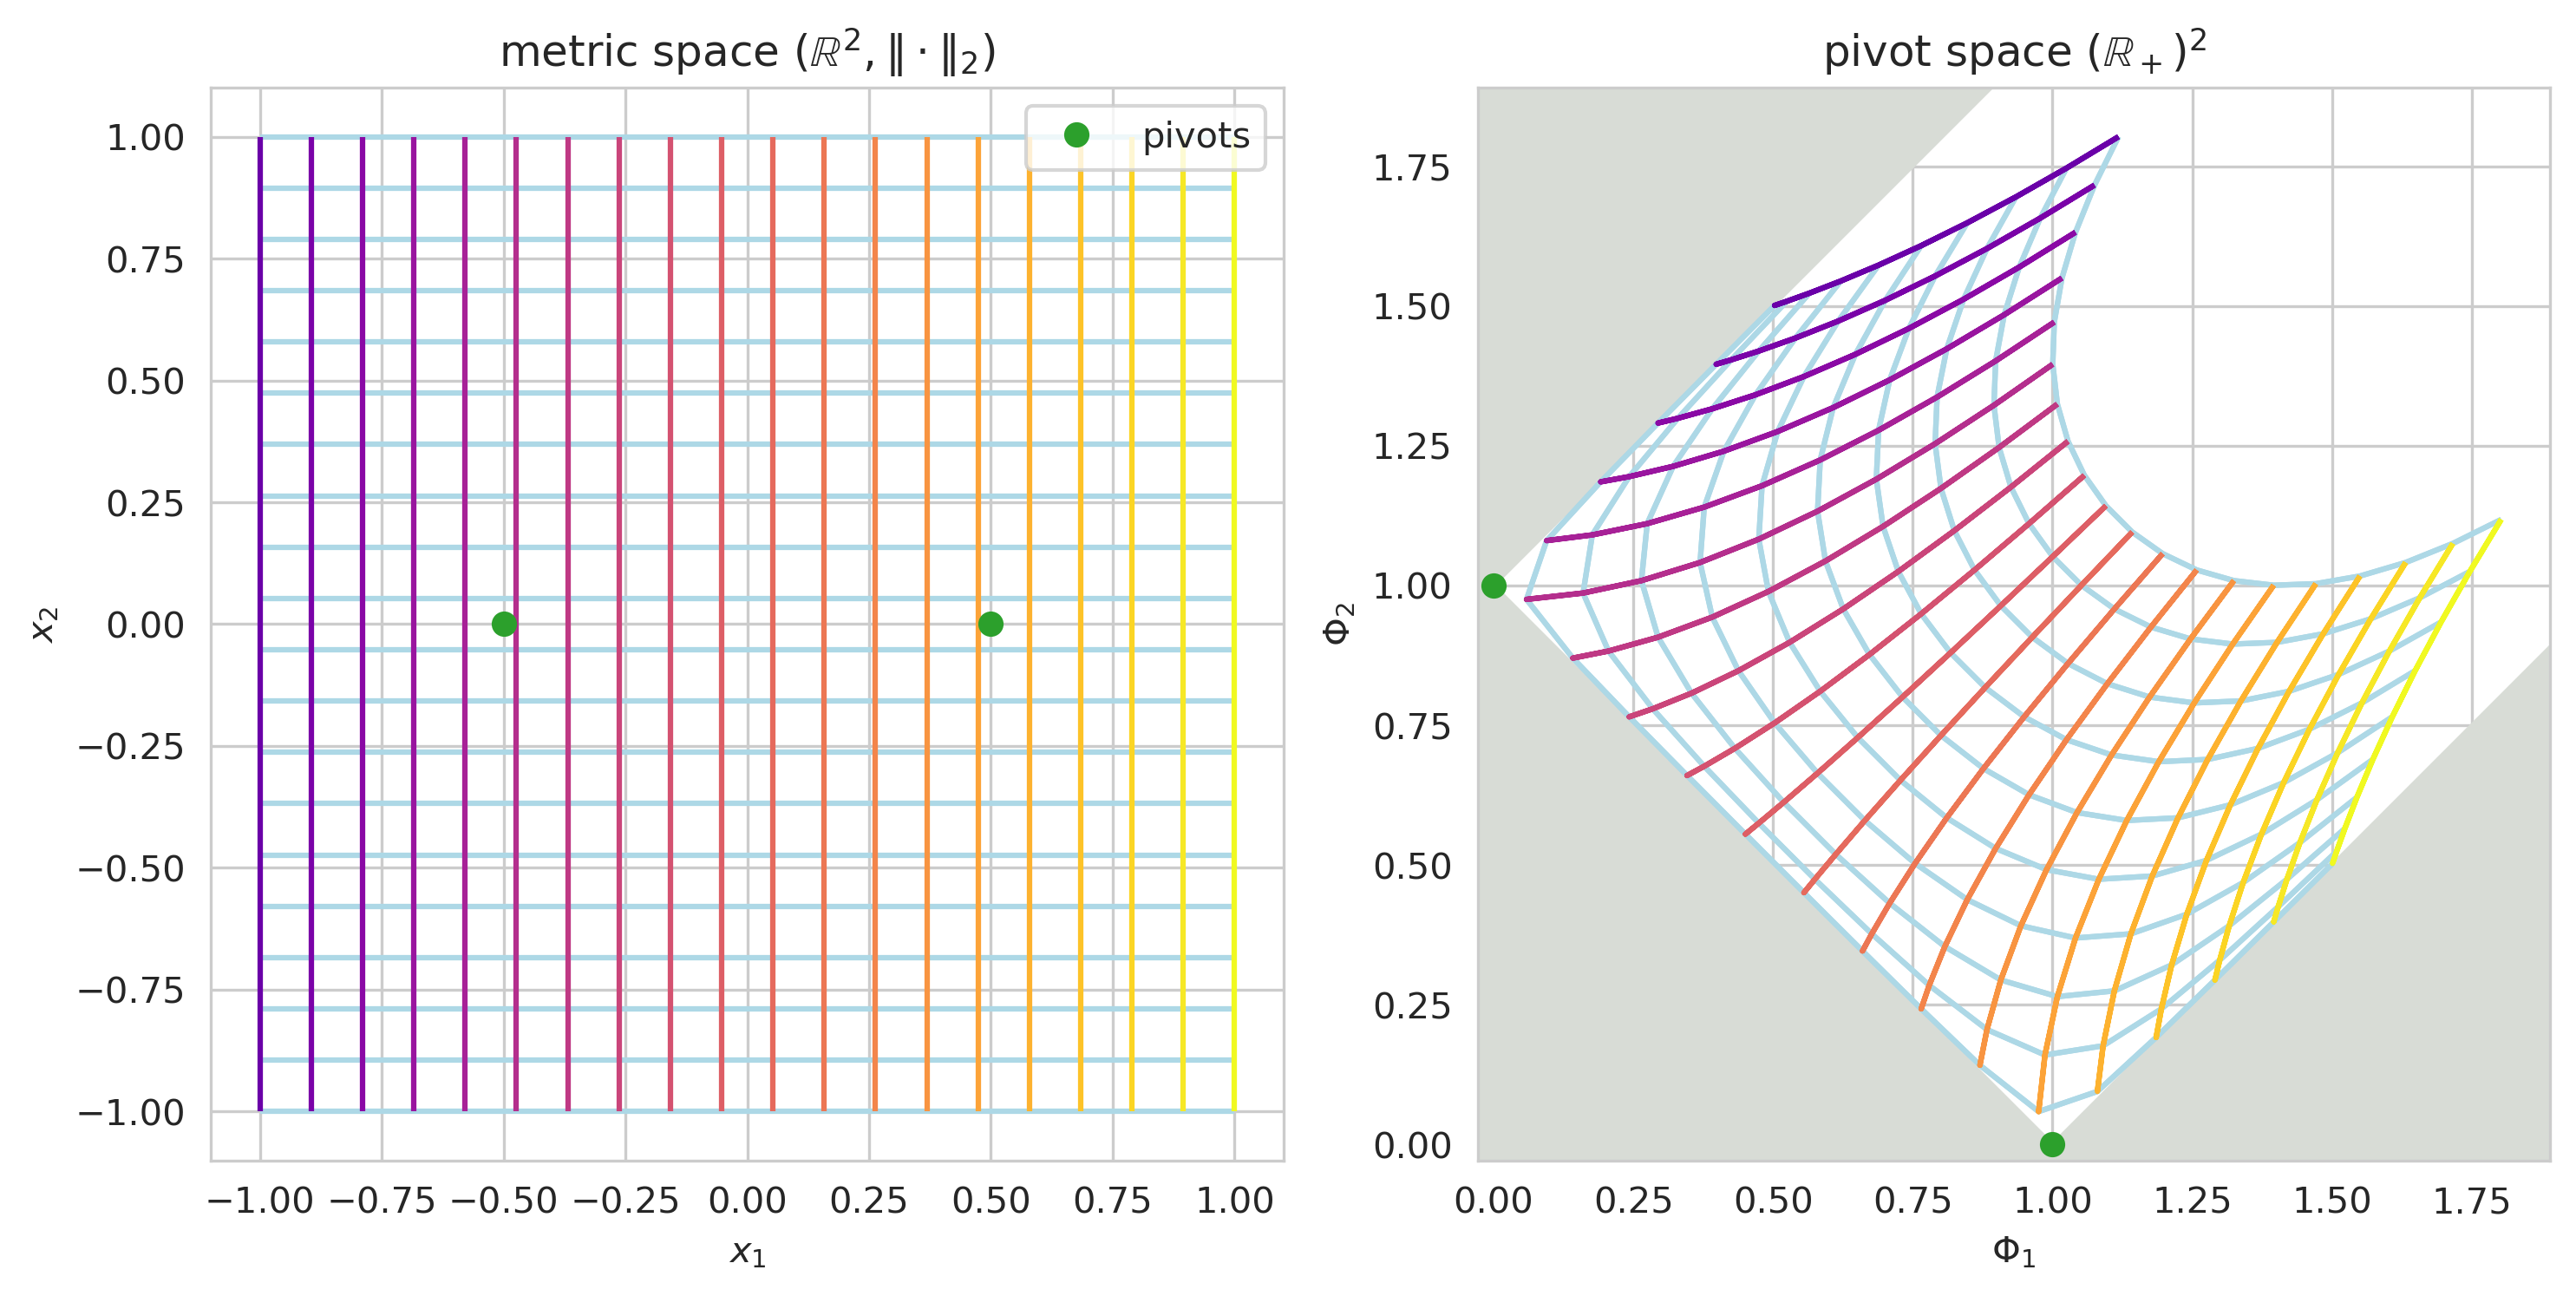

In [3]:
n = 20
xx, yy = np.meshgrid(np.linspace(-1,1, n), np.linspace(-1, 1,n))

points = np.array([xx.flatten(), yy.flatten()]).T
p_t = piv.transform_points(points)
xx_t, yy_t = p_t.T
xx_t = xx_t.reshape(xx.shape)
yy_t = yy_t.reshape(yy.shape)

cmap_1 = mpl.colormaps['plasma']
config = dict(
    ycolor = cmap_1(np.linspace(0.2,1, xx.shape[0])),
    xcolor = "lightblue",
)

viz.autoscale=False
viz.plot(
    "r_2_grid.svg",
    lambda ax: plot_grid(xx,yy, **config),
    lambda ax: plot_grid(xx_t,yy_t, **config),
)

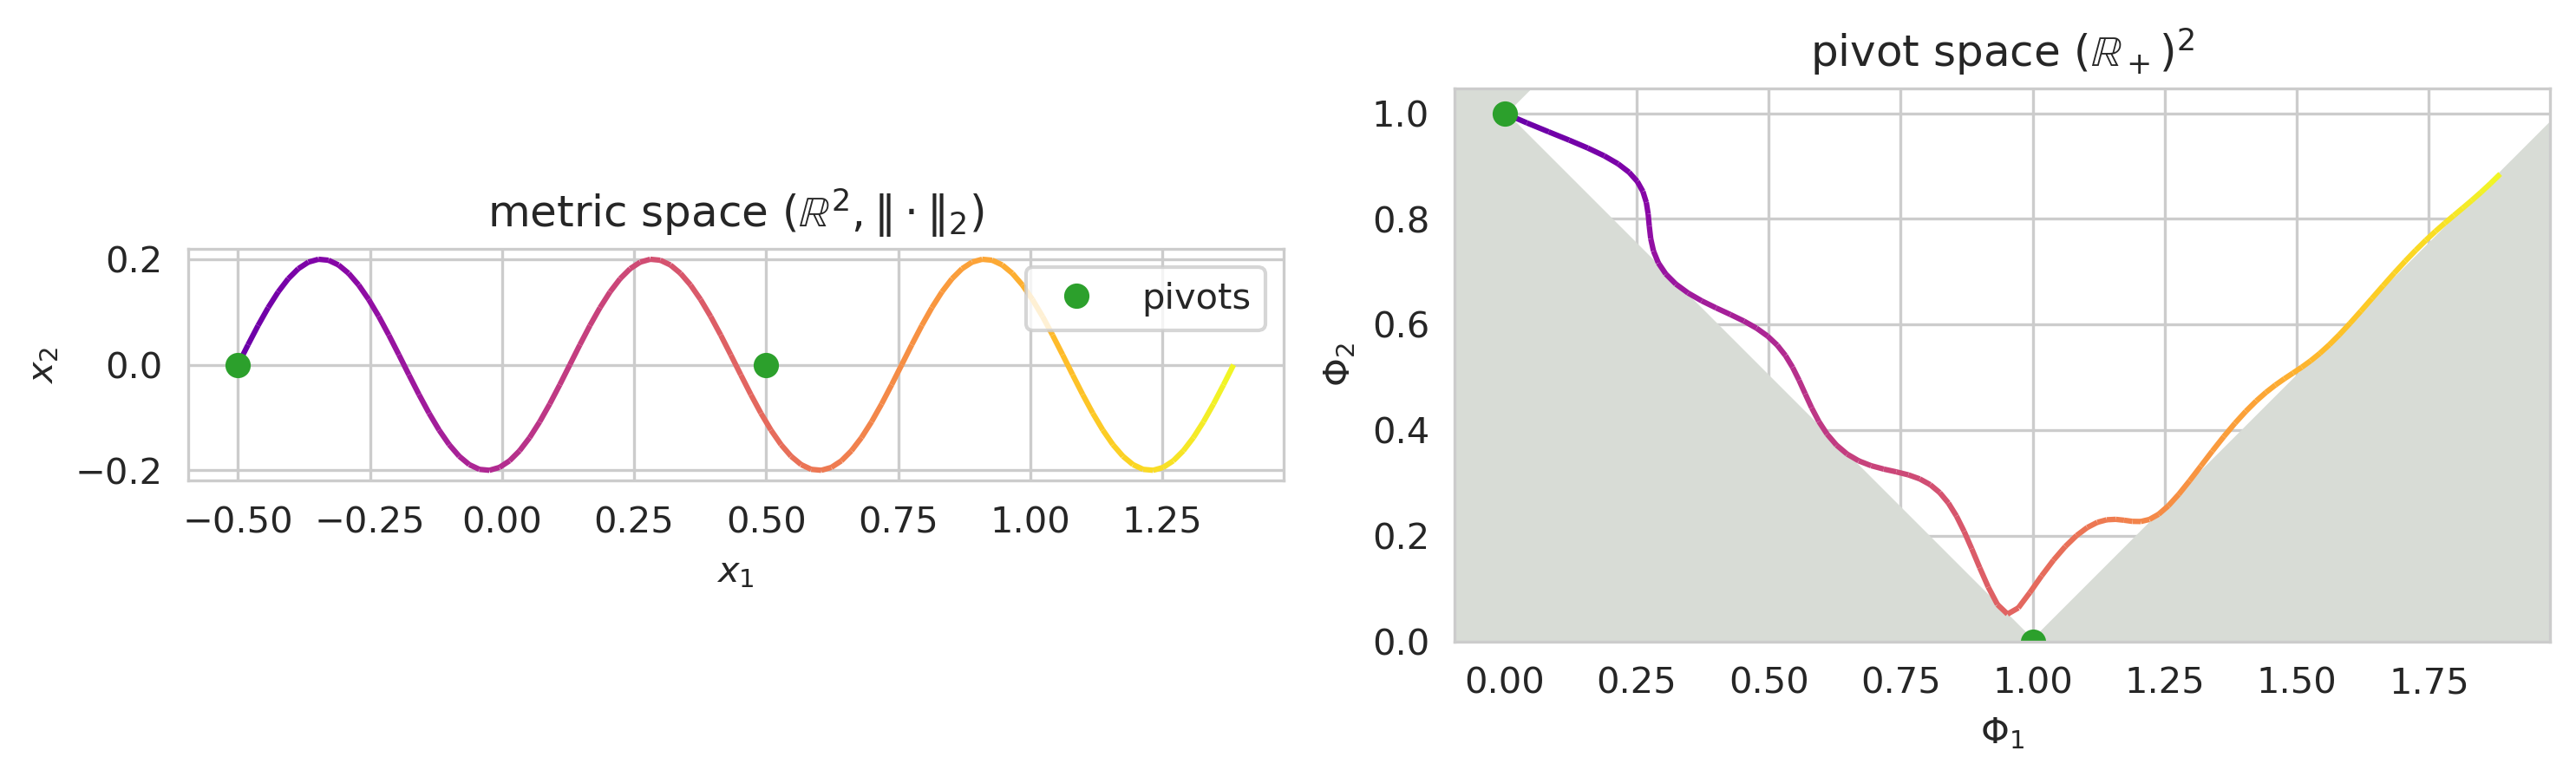

In [4]:
x = np.linspace(0, np.pi * 6, 100)
points = np.array([x/10-0.5,np.sin(x)/5]).T
p_t = piv.transform_points(points)

def plot_colored_line(ax, points, cmap=None):
    if cmap is None:
        cmap = mpl.colormaps['plasma']
    colors = cmap(np.linspace(0.2,1, len(points)))
    points = points.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    lc = LineCollection(segments, color=colors)
    ax.add_collection(lc)
    ax.autoscale()



viz.plot(
    "r_2_sin_1.svg",
    lambda ax: plot_colored_line(ax, points),
    lambda ax: plot_colored_line(ax, p_t),
)

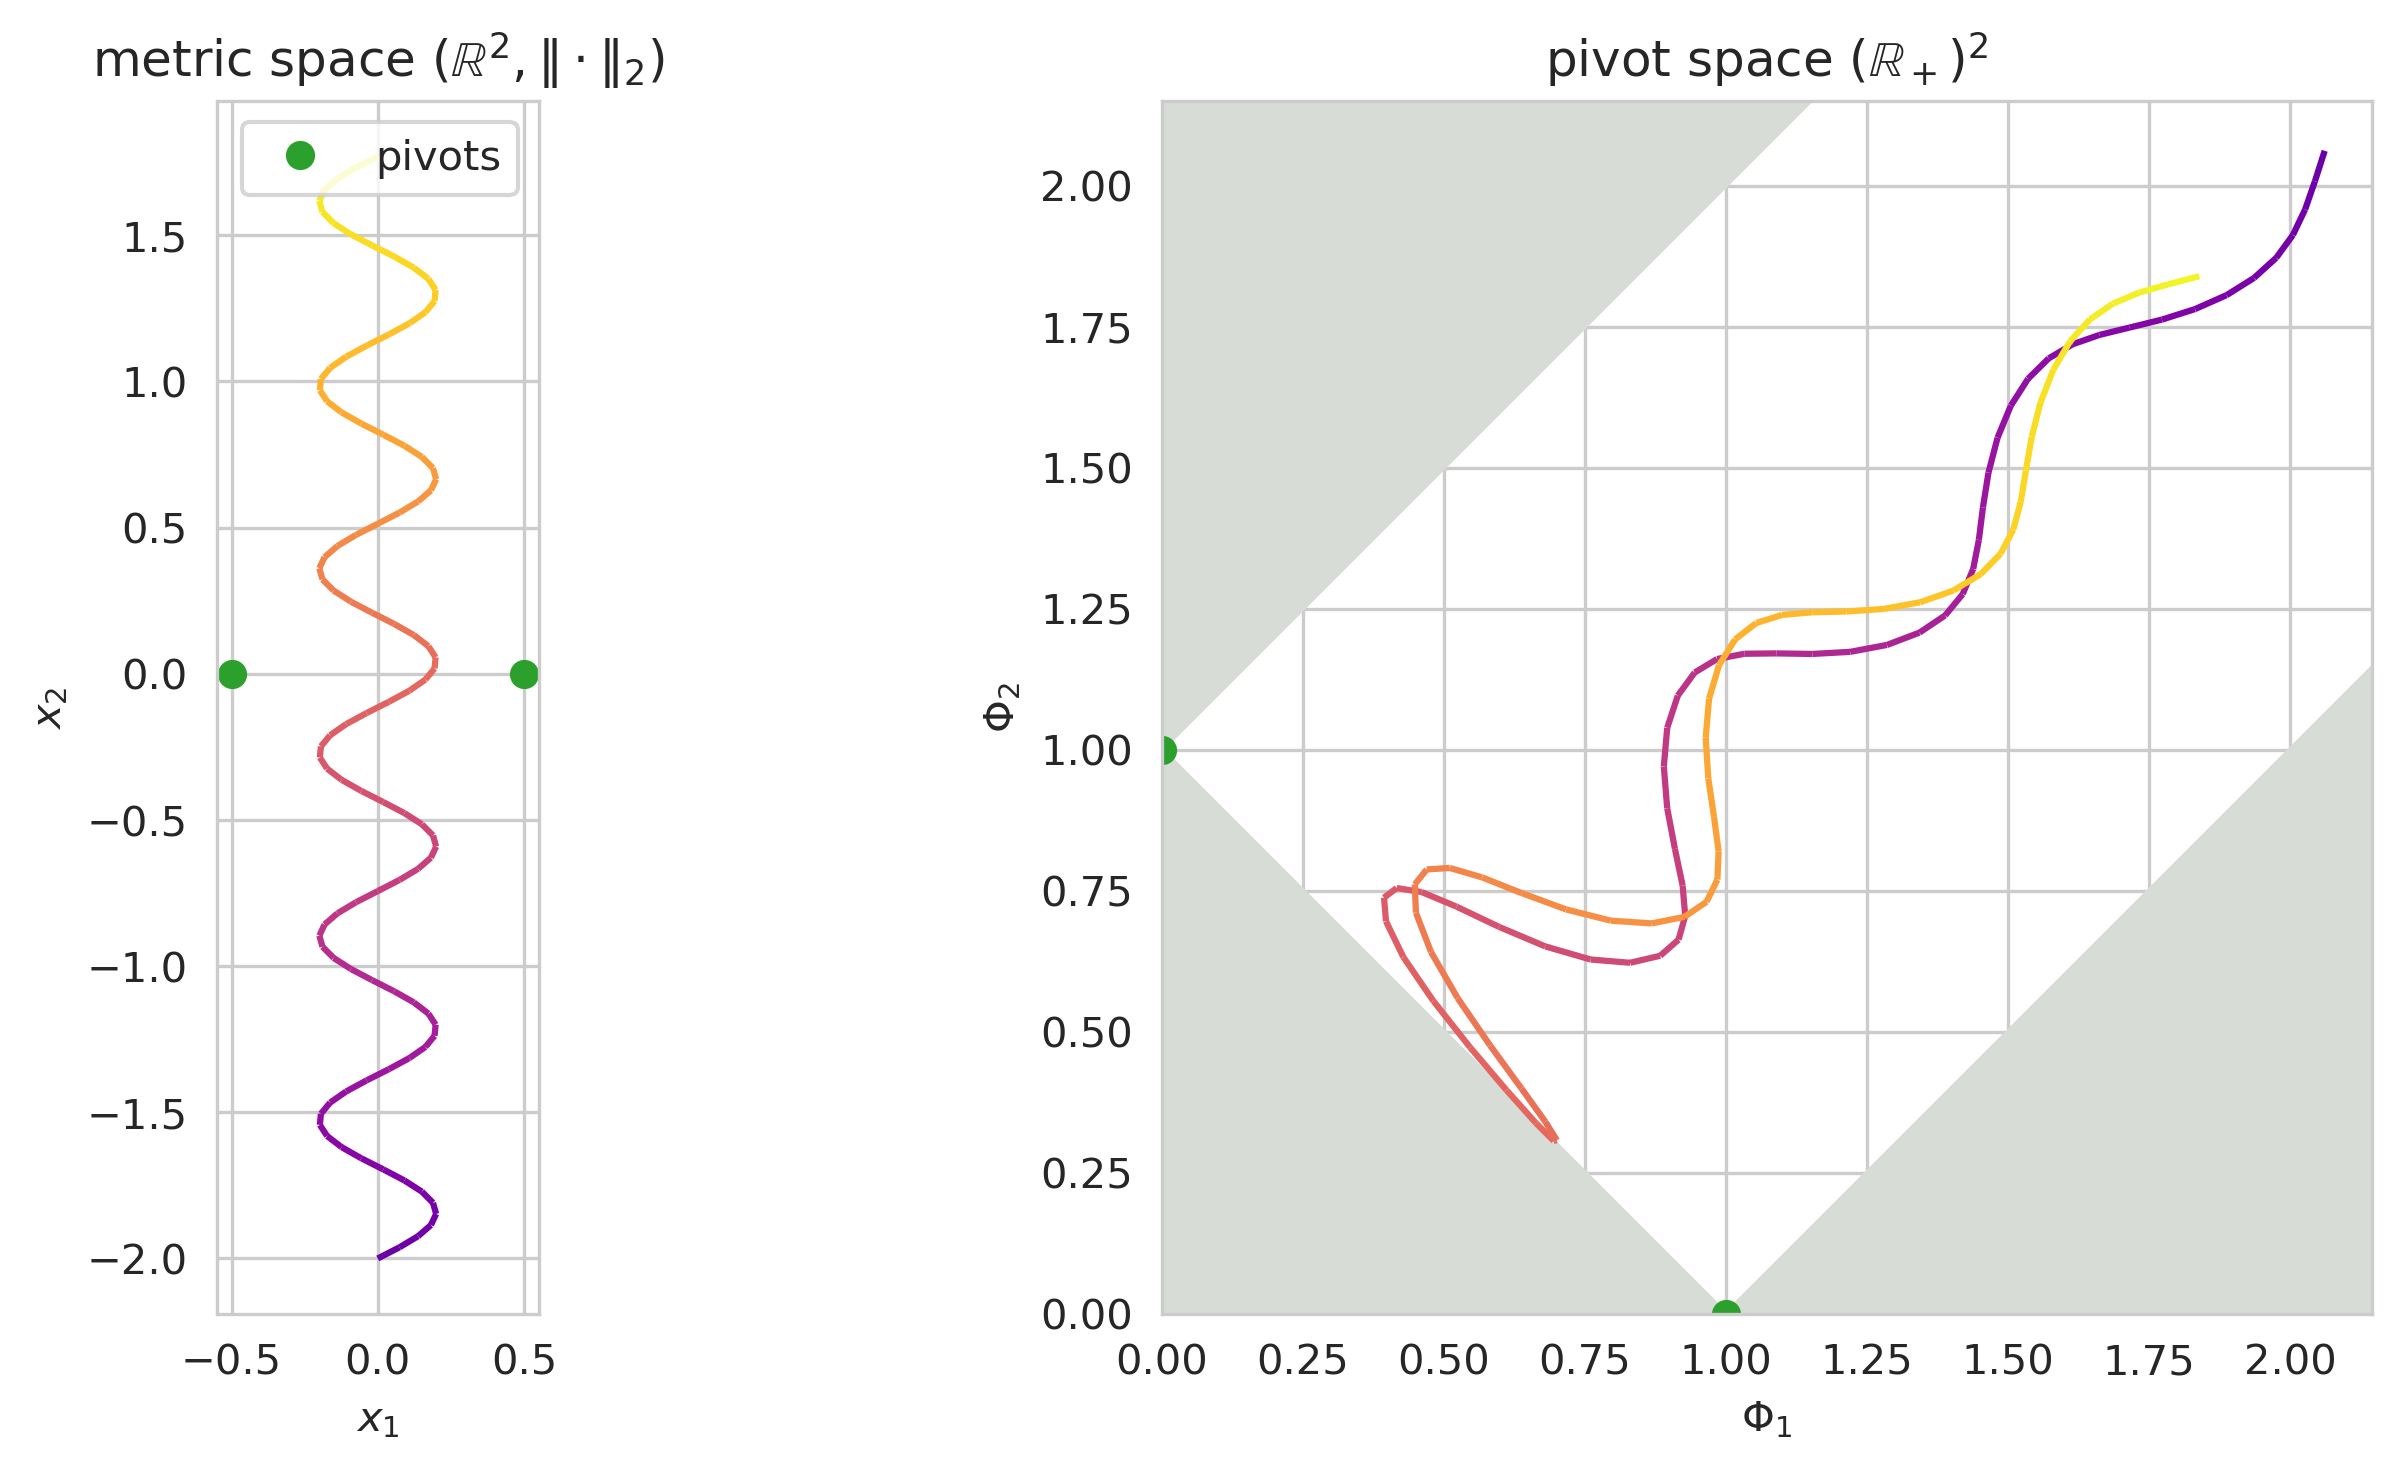

In [5]:
x = np.linspace(0, np.pi * 12, 100)
points = np.array([np.sin(x)/5, x/10-2]).T
p_t = piv.transform_points(points)

viz.plot(
    "r_2_sin_2.svg",
    lambda ax: plot_colored_line(ax, points),
    lambda ax: plot_colored_line(ax, p_t),
)

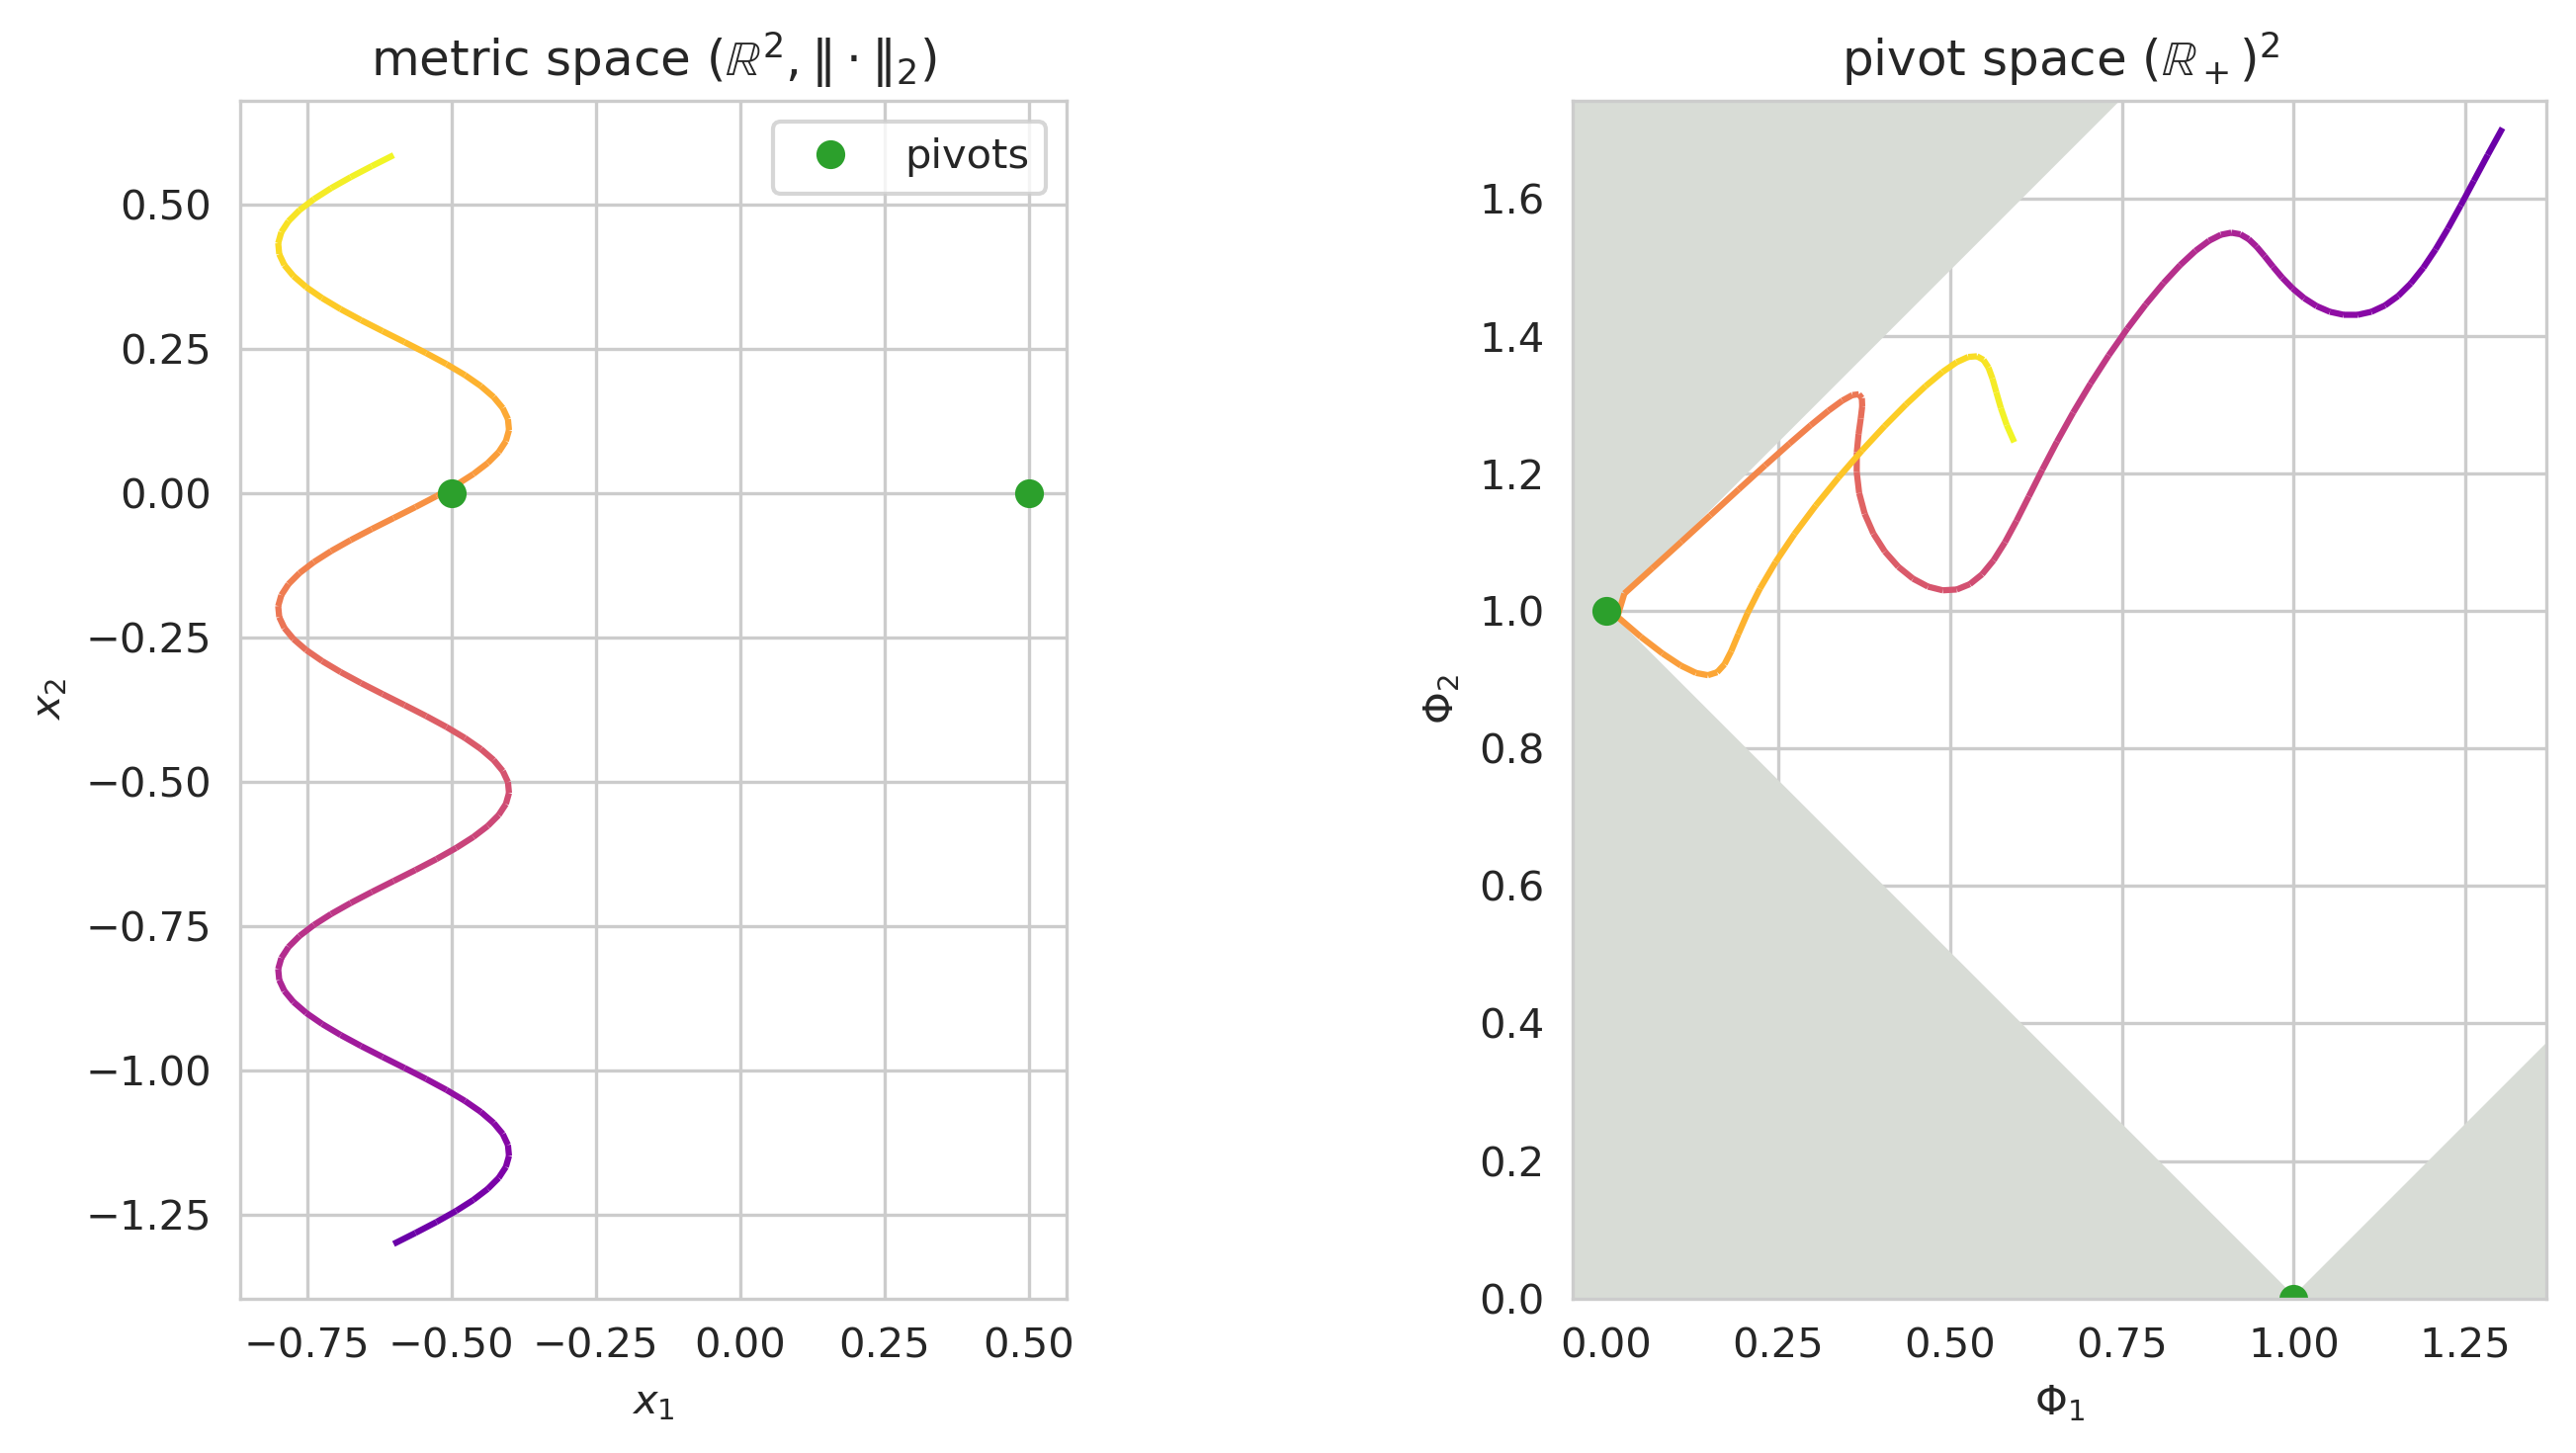

In [6]:
x = np.linspace(0, np.pi * 6, 100)
points = np.array([np.sin(x)/5-0.6, x/10-1.3]).T
p_t = piv.transform_points(points)

viz.plot(
    "r_2_sin_3.svg",
    lambda ax: plot_colored_line(ax, points),
    lambda ax: plot_colored_line(ax, p_t),
)

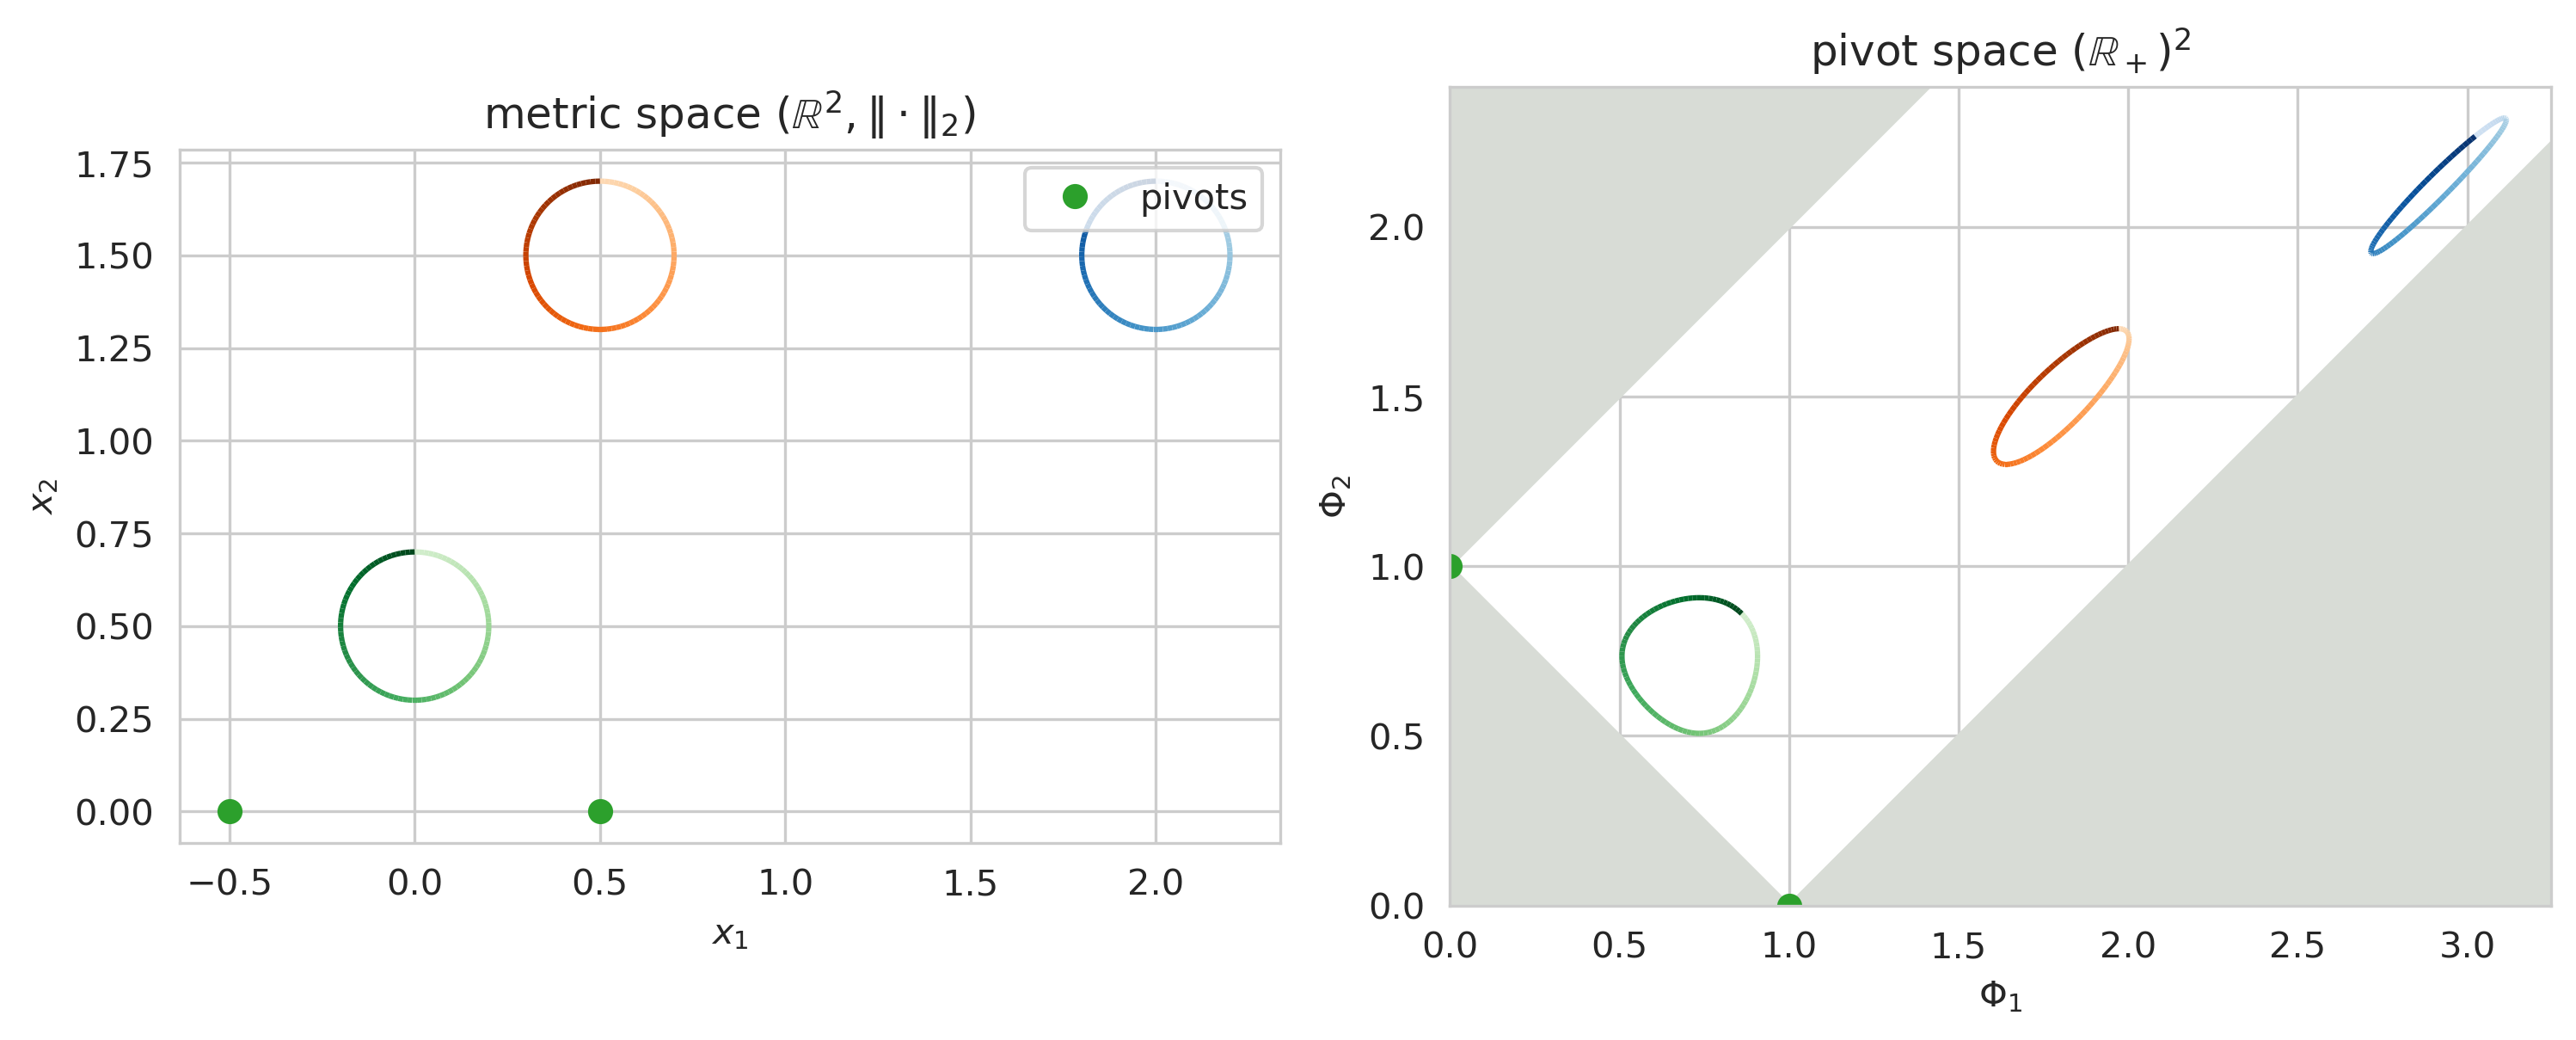

In [7]:
def get_circle(center=(1,2)):
    center = np.array(center)
    x = np.linspace(0, np.pi * 2, 100)
    r = 0.2
    points = center + np.array([r*np.sin(x), r*np.cos(x)]).T
    points_transformed = piv.transform_points(points)
    return points, points_transformed

cmaps = ["Blues","Oranges","Greens"]
cmaps = [mpl.colormaps[c] for c in cmaps]
circles = [
    get_circle((2,1.5)),
    get_circle((0.5,1.5)),
    get_circle((0,0.5)),
]

def plot_metric_s(ax):
    for (points,_),cmap in zip(circles, cmaps):
        plot_colored_line(ax, points, cmap)

def plot_pivot_s(ax):
    for (_,points_transformed),cmap in zip(circles, cmaps):
        plot_colored_line(ax, points_transformed, cmap)

viz.plot(
    "r_2_queries.svg",
    plot_metric_s,
    plot_pivot_s,
)